# Práctica 1 - Visión por Computador

### Autores

- Pablo Segura López
- Kilian Armas Pérez

### Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

## Tarea 1 - Crear una imagen con la textura del tablero de ajedrez

Inicializamos las variables alto y ancho para dibujar un tablero de 800x800 píxeles.

In [2]:
#Dimensiones del tablero de ajedrez
ancho = 800
alto = 800

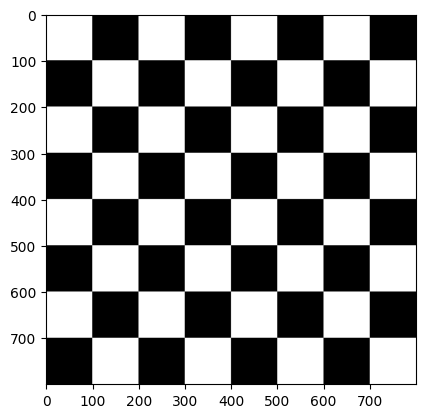

In [3]:
gray_img = np.zeros((alto,ancho,1), dtype = np.uint8)
#Modifica la imagen para crear un tablero de ajedrez
for i in range(0,8):
    for j in range(0,8):
        if (i + j + 2) % 2 == 0:
            gray_img[i*100:(i+1)*100,j*100:(j+1)*100, 0:2] = 255

#Visualiza con mapa de color gris
plt.imshow(gray_img, cmap='gray')
plt.show()

## Tarea 2 - Crear una imagen estilo Mondrian

Inicializamos las variables alto y ancho para dibujar la imagen de 600x600 píxeles.

In [4]:
#Dimensiones de la imagen estilo Mondrian
ancho = 600
alto = 600

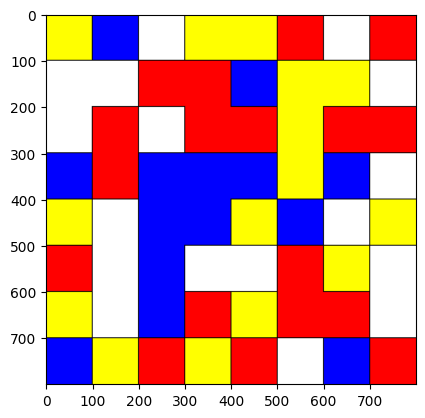

In [5]:
# Imagen en blanco
image = np.ones((ancho, alto, 3), dtype=np.uint8) * 255

# Colores de los recuadros
colors = {
    'red': (255, 0, 0),
    'blue': (0, 0, 255),
    'yellow': (255, 255, 0),
    'white': (255, 255, 255)
}

# Rellenar un cuadrado de un color aleatorio
for i in range(0, int(ancho/100)):
    for j in range(0, int(alto/100)):
        image[i*100:(i+1)*100,j*100:(j+1)*100] = colors[np.random.choice(list(colors.keys()))]

# Líneas horizontales
for i in range(0,int(ancho/100)):
    for j in range(0, alto):
        if not np.array_equal(image[(i * 100) - 1, j], image[(i * 100) + 1, j]):
            image[(i*100)-1 : (i*100) + 1,j] = (0,0,0)

# Líneas verticales
for i in range(0,ancho):
    for j in range(0,int(alto/100)):
        if not np.array_equal(image[i,(j*100)-1], image[i,(j*100)+1]):
            image[i,(j*100)-1 : (j*100)+1] = (0,0,0)

plt.imshow(image)
plt.show()

## Tarea 3 - Resolver una de las tareas previas con las funciones de dibujo de OpenCV

Inicializamos las variables alto y ancho para dibujar un tablero de 800x800 píxeles.

In [ ]:
#Dimensiones del tablero de ajedrez
ancho = 800
alto = 800

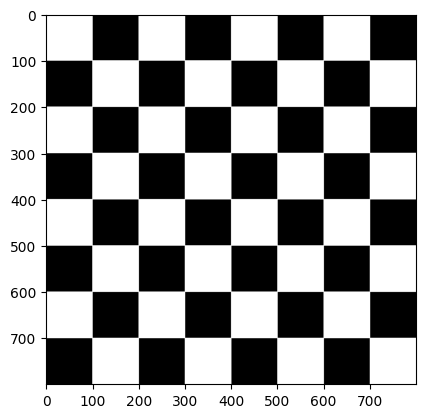

In [6]:
gray_img = np.zeros((alto,ancho,1), dtype = np.uint8)
#Modifica la imagen para crear un tablero de ajedrez
for i in range(0, 8):
    for j in range(0, 8):
        if (i + j + 2) % 2 == 0:
            cv2.rectangle(gray_img, (i*100, j*100), ((i+1)*100, (j+1)*100), (255, 255, 255), -1)

plt.imshow(gray_img, cmap='gray') 
plt.show()

## Tarea 4 - Modificar de forma libre los valores de un plano de la imagen

In [28]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]

        r = cv2.Canny(r, 100, 200)  # Aplica un filtro de detección de bordes al canal rojo

        # Modificamos el plano verde invirtiendo sus valores
        g = cv2.bitwise_not(g)  # Invertir el canal verde

        _, b = cv2.threshold(b, 127, 255, cv2.THRESH_BINARY)  # Aplica un umbral binario al canal azul

        # Dimensiones imagen de entrada
        h, w, c = frame.shape

        # Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, g, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

## Tarea 5 - Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen

In [39]:
import cv2
import numpy as np

vid = cv2.VideoCapture(0)

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
    
    if ret:
        # Dimensiones imagen de entrada
        h, w, c = frame.shape

        # Calcular luminiscencia usando operaciones vectorizadas
        luminiscence = 0.299 * frame[:,:,2] + 0.587 * frame[:,:,1] + 0.114 * frame[:,:,0]

        # Encontrar los índices del píxel más oscuro y más brillante
        min_idx = np.unravel_index(np.argmin(luminiscence), luminiscence.shape)
        max_idx = np.unravel_index(np.argmax(luminiscence), luminiscence.shape)

        # Dibujar círculos en los píxeles más oscuro y más brillante
        cv2.circle(frame, (min_idx[1], min_idx[0]), 5, (255,255,255), -1)
        cv2.circle(frame, (max_idx[1], max_idx[0]), 5, (0,0,0), -1)

        # Muestra fotograma
        cv2.imshow('Vid', frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

### Pregunta - ¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

## Tarea 6 - Llevar a cabo una propuesta propia de pop art